#**Building Good Training Datasets–Data Preprocessing**


***

**좋은 학습 데이터셋 만드는 법 - 데이터 전처리**



 <br/><br/>

##**서론**

데이터의 품질과 포함된 유용한 정보의 양은 기계 **학습 알고리즘이 얼마나 잘 학습할 수 있는지**를 결정하는 핵심 요소이다.

따라서 기계 학습 알고리듬에 데이터 세트를 공급하기 전에 **데이터 세트를 검사하고 사전 처리하는 것이 절대적으로 중요**하다.

이 장에서 다룰 내용

* 데이터 집합에서 결측값 제거 및 귀속  
* 기계 학습 알고리즘을 위한 범주형 데이터 구체화  
* 모델 구성에 대한 관련 기능 선택





---



 <br/><br/>

## **Dealing with missing data**



**결측 데이터 처리**

실제 훈련데이터 세트에서 다양한 이유로 하나 이상의 값을 누락하는 것은 드문 일이 아니다. 

데이터 수집 프로세스에 오류가 있거나, 특정 측정값을 적용할 수 없거나, 특정 필드가 설문 조사에 단순히 비어 있을 수 있다. 이 때 다양한 표현으로 NaN이나 NULL같은 문자열로 표기할 수 있다.

대부분 계산 과정에서 이런 누락된 값을 처리할 수 없거나 **단순히 무시하면 예측할 수 없는 결과를 초래할 수 있기에, 분석을 진행하기 전에 누락된 값을 처리하는것이 중요**하다.

데이터 세트에서 항목을 제거하거나 다른 훈련 예제 및 기능에서 누락된 값을 귀속하여 결측값을 처리하기 위한 실용적인 기숭을 통해 작업을 진행할 예정이다.



---

 <br/><br/>

###**Identifying missing values in tabular data**

**표 데이터에서 결측값 식별**

`.csv` 확장자 파일을 통해 간단한 DataFrame을 만들어서 결측값을 처리하는 기술에 대해서 파악해보자.



```
>>> import pandas as pd
>>> from io import StringIO
>>> csv_data = \
... '''A,B,C,D
... 1.0,2.0,3.0,4.0
... 5.0,6.0,,8.0
... 10.0,11.0,12.0,'''
>>> # If you are using Python 2.7, you need
>>> # to convert the string to unicode:
>>> # csv_data = unicode(csv_data)
>>> df = pd.read_csv(StringIO(csv_data))
>>> df
     A      B     C       D
0   1.0    2.0   3.0     4.0
1   5.0    6.0   NaN     8.0
2   10.0   11.0  12.0    NaN
```



이전 장의 코드를 통해서 read_csv함수를 통해 csv 확장자 데이터를 판다 데이터프레임으로 읽었으며, 누락된 데이터들이 NaN으로 채워진 것을 알게되었다.


이렇게 작은 경우는 결측값이 한눈에 보이지만, 큰 데이터프레임일 경우에는 수동으로 찾는데 지루하고 시간이 많이 걸린다. 이 경우 pandas에서 제공하는 `isnull()` 메소드를 통해서 **표 셀에 숫자값이 포함되어 있는지(False) 또는 데이터가 누락되어 있는지(True)를 나타내는 부울값으로 데이터프레임을 반환**한다.

이 메소드를 통해서 결측값을 반환할 수 있다.



```
>>> df.isnull().sum()
A 0
B 0
C 1
D 1
dtype: int64
```



isnull()을 통해서 결측값 수를 셀수 있게 되었다.

---
<br></br>

### **Eliminating training examples or features with missing values**

**훈련 예제와 features에 있는 결측값 제거하기**

결측 데이터를 처리하는 가장 쉬운 방법 중 하나는 데이터 세트에서 해당 features(열) 또는 훈련 예제(행)를 완전히 제거하는 방법이다.

**결측값이 있는 행은 dropna 방법을 통해 쉽게 삭제**할 수 있다.



```
>>> df.dropna(axis=0)

  A     B   C   D
0 1.0 2.0 3.0 4.0
```



**축 인수를 1로 설정**하여 행에 하나 이상의 NAN(결측값)이 있는 열을 삭제할 수 있다.




```
>>> df.dropna(axis=1)


      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
```



dropna 메소드는 다음과 같은 몇가지 추가 매개 변수를 지원한다.



```
>>> # only drop rows where all columns are NaN
>>> # (returns the whole array here since we don't
>>> # have a row with all values NaN)
>>> df.dropna(how='all')

     A     B    C    D
0  1.0   2.0  3.0  4.0
1  5.0   6.0  NaN  8.0
2 10.0  11.0 12.0  NaN
```




```
>>> # drop rows that have fewer than 4 real values
>>> df.dropna(thresh=4)

    A   B   C   D
0 1.0 2.0 3.0 4.0
```


```
>>> # only drop rows where NaN appear in specific columns (here: 'C')
>>> df.dropna(subset=['C'])

      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN
```



이 모두 NaN인 경우에만 삭제하도록 하는 how=all 옵션, 특정 임계값을 지정한는 thresh=N, 특정 열에 NaN인 경우에만 삭제하도록 하는 subset=['__'] 옵션도 있다.

하지만 너무 많은 행을 삭제하는 경우 realiable analysis가 불가능할 수 있고, 많은 열을 삭제하는 경우 클래스들을 구분하기 위한 다양한 정보를 잃어버릴 수 있다.

---
<br></br>

### **Imputing missing values**

훈련 예제를 제거하거나 전체 feature 열을 삭제하는 것은 너무 많은 귀중한 데이터를 잃을 수 있게 때문에 실현 가능한 방법이 아니다. 이를 해결하는 가장 **일반적인 보간 기술 중 하나는 평균 귀속**이며, 여기서는 결측값을 전체 feature 열의 평균값으로 간단히 교체한다.


`scikit-learn`의 `SimpleImputer` 클래스로 사용가능하다.
```
>>> from sklearn.impute import SimpleImputer
>>> import numpy as np
>>> imr = SimpleImputer(missing_values=np.nan, strategy='mean')
>>> imr = imr.fit(df.values)
>>> imputed_data = imr.transform(df.values)
>>> imputed_data
array([[ 1., 2., 3., 4.],
[ 5., 6., 7.5, 8.],
[ 10., 11., 12., 6.]])
```



이 방법 이외에도 `df.fillna(df.mean())`을 통해서도 동일한 평균 귀속을 실행할 수 있다.

---
<br></br>

### **Understanding the scikit-learn estimator API** 

위에서 사용한 SimpleImputer 클래스는 skickit-learn의 transformer API의 일부이다.
이와같은 transform의 두 가지 필수 방법은 적합성과 변환이다. 자연어처리에 사용되는 transformer와는 다르지만 두 transformer 모두 **`fit`**과 **`transfor`**이 사용된다.

**`fit`**은 훈련 데이터에서 매개 변수를 학습하는데 사용되며 변환 방법은 이러한 매개 변수를 사용하여 데이터를 변환한다. **`transform`**변환할 데이터 배열은 모형을 적합시키는데 사용된 데이터 배열과 동일한 수의 feature를 가져야 한다.

---

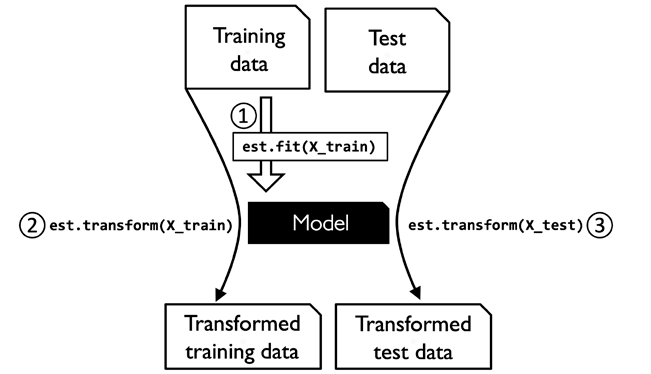

*Fig 1. Using the scikit-learn API for data transformation*

그림 1은 교육 데이터에 scickit-learn transformer 인스턴스가 교육 데이터 세트 및 새로운 테스트 데이터세트를 변환하는 방법을 설명하는 그림이다.


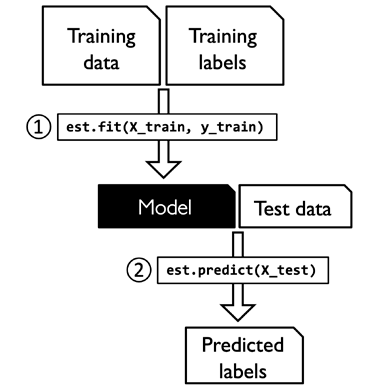

*Fig 2. Using the scikit-learn API for predictive models such as classifiers*

분류 작업을 위해 estimators를 훈련시킬 때 모델의 매개 변수를 학습하기 위해 적합 방법을 3장에서 사용했었다. 하지만 지도 학습 작업에서는 모델을 맞추기 위한 클래스 레이블을 추가로 제공하고, Fig 2에 설멷된 대로 예측 방법을 통해 레이블이 지정되지 않은 새롱누 데이터 예제에 대한 예측을 하는데 사용할 수 있다.

---
<br></br>

## **Handling categorical data**

지금까지 예시로 우리는 수치데이터만 가지고 예시를 다뤘다. 하지만 실제 데이터세트에는 하나 이상의 범주형 feature 열을 포함하는 것은 드문일이 아니다. 이 장에서는 수치 계산 라이브러리에서 이러한 유혀으이 데이터를 처리하는 방법에 대해 알아볼 것이다.

범주형 데이터에 대해 이야기할 떄, **`ordinal`**과 **`nominal`**을 구분해야 한다. 

**`ordinal`**은 정렬 또는 순서로 나열이 가능한 범주형 값으로 이해하면 된다. 예시로
`XL> L > M` 를 예시로 들 수 있으며,빨간색이 파란색보다 크다고 말하는 것은 일반적으로 말이 안되기에 **`nominal`**은 티셔츠 색상과 같은 명목상의 특징으로 이해하면 된다. 

### **Categorical data encoding with pandas**

카테고리데이터와 같은 범주형 데이터를 처리하는 기술을 알아보기 위해 새로운 데이터프레임을 생성



```
>>> import pandas as pd
>>> df = pd.DataFrame([
... ['green', 'M', 10.1, 'class2'],
... ['red', 'L', 13.5, 'class1'],
... ['blue', 'XL', 15.3, 'class2']])
>>> df.columns = ['color', 'size', 'price', 'classlabel']
>>> df
     color   size   price   classlabel
0    green    M      10.1    class2
1    red      L      13.5    class1
2    blue     XL     15.3    class2
```



새로 생성된 예시 데이터프레임은 `nominal`데이터인 `color`와 `ordinal`데이터인 `size`, `numerical`데이터인 `price` 열이 포함되어 있다. 클래스 레이블은 마지막 열에 저장이 되어있다.

---
<br></br>

### **Mapping ordinal features**